In [53]:
import warnings
warnings.filterwarnings("ignore")
import cv2
import os
import numpy as np
import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from keras.applications import VGG16
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

In [26]:
data_path = r"D:\\flower_data (2)\\flower_data\\train"
img_size=256             
counter=0            
X=[]
Y=[]
 
categories=os.listdir(data_path)
 
for category in categories:                                                            # this loop to know how many images in categories
    folder_path=os.path.join(data_path,category)                                       # make folder empty has the same path for dataset
    img_names=os.listdir(folder_path)                                                  # put each image in this folder
 
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        fullpath=os.path.join(data_path,category,img_name)
        try:
            img = cv2.imread(fullpath, cv2.IMREAD_COLOR)
            img = cv2.resize(img, (img_size,img_size))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2XYZ)
            X.append(img)
            Y.append(category)
            counter+=1
            print("preprocessing Image Number==> ",counter)
        except:
            print("Error in ==> ",counter)
 
imgs=np.array(X)
lbls=np.array(Y)
del X
del Y
 

preprocessing Image Number==>  1
preprocessing Image Number==>  2
preprocessing Image Number==>  3
preprocessing Image Number==>  4
preprocessing Image Number==>  5
preprocessing Image Number==>  6
preprocessing Image Number==>  7
preprocessing Image Number==>  8
preprocessing Image Number==>  9
preprocessing Image Number==>  10
preprocessing Image Number==>  11
preprocessing Image Number==>  12
preprocessing Image Number==>  13
preprocessing Image Number==>  14
preprocessing Image Number==>  15
preprocessing Image Number==>  16
preprocessing Image Number==>  17
preprocessing Image Number==>  18
preprocessing Image Number==>  19
preprocessing Image Number==>  20
preprocessing Image Number==>  21
preprocessing Image Number==>  22
preprocessing Image Number==>  23
preprocessing Image Number==>  24
preprocessing Image Number==>  25
preprocessing Image Number==>  26
preprocessing Image Number==>  27
preprocessing Image Number==>  28
preprocessing Image Number==>  29
preprocessing Image Num

In [27]:
#Label Encoding
le = preprocessing.LabelEncoder()
le.fit(lbls)
lbls_encoded = le.transform(lbls)
 
#Train and Test Split
train_x, test_x,train_y, test_y = train_test_split(imgs,lbls_encoded,test_size=0.10,shuffle='true',random_state=40)
 
#Normalization
train_x, test_x = train_x / 255.0,  test_x / 255.0 


In [28]:

#Feature Extraction
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_size,img_size, 3) )
for layer in VGG_model.layers:
    layer.trainable = False
 
VGG_model.summary()  
feature_extractor=VGG_model.predict(train_x)
features_train = feature_extractor.reshape(feature_extractor.shape[0], -1)
feature_extractor_test=VGG_model.predict(test_x)
features_test = feature_extractor_test.reshape(feature_extractor_test.shape[0], -1)

  

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [43]:

#ANN
#val_loss_(dec)_val_acc_(inc)
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(40, activation="softmax")]) # change number based on output classes
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
ann=model.fit(features_train, train_y, epochs=10,validation_data=(features_test, test_y))
y_preds = model.predict(features_test).argmax(axis=1)
Accuracy = accuracy_score(test_y,y_preds)
print("Accuracy :", Accuracy)

Epoch 1/10
57/57 [==============================] - 4s 53ms/step - loss: 2.5526 - accuracy: 0.4083 - val_loss: 1.0473 - val_accuracy: 0.6931
Epoch 2/10
57/57 [==============================] - 3s 46ms/step - loss: 0.4833 - accuracy: 0.8757 - val_loss: 0.8643 - val_accuracy: 0.7376
Epoch 3/10
57/57 [==============================] - 3s 45ms/step - loss: 0.1723 - accuracy: 0.9597 - val_loss: 0.4519 - val_accuracy: 0.8713
Epoch 4/10
57/57 [==============================] - 3s 47ms/step - loss: 0.0441 - accuracy: 0.9967 - val_loss: 0.4524 - val_accuracy: 0.8911
Epoch 5/10
57/57 [==============================] - 3s 46ms/step - loss: 0.0157 - accuracy: 0.9989 - val_loss: 0.4046 - val_accuracy: 0.8960
Epoch 6/10
57/57 [==============================] - 3s 48ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.3972 - val_accuracy: 0.8960
Epoch 7/10
57/57 [==============================] - 3s 47ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.3939 - val_accuracy: 0.8960
Epoch 8/10
57

In [44]:
test_y_Normal = le.inverse_transform(test_y)

[[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0 15  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1  0]
 [ 0  1  0  0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0 

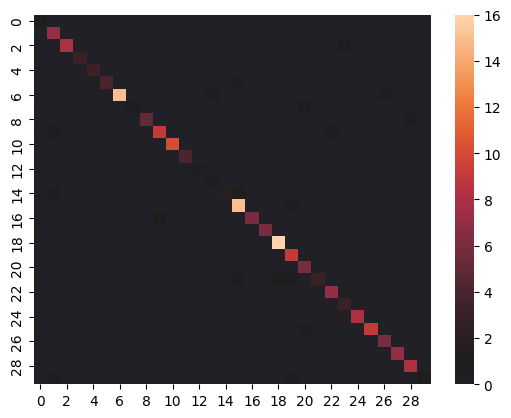

In [45]:
cm=confusion_matrix(test_y, y_preds)
print(cm)
print(classification_report(test_y, y_preds))
# drawing confusion matrix
sns.heatmap(cm, center = True)
plt.show()

AUC Value  :  0.9922680412371134


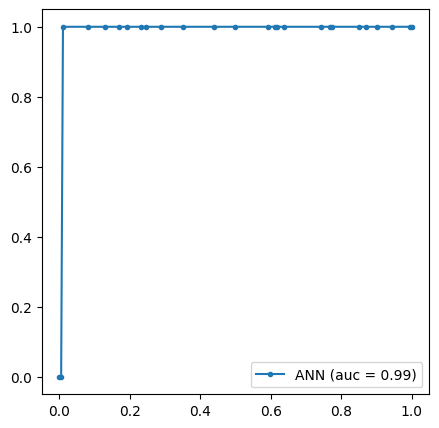

In [48]:
#Calculating ROC:  
#roc_curve(y_test, y_pred, pos_label=None, sample_weight=None,drop_intermediate=True)

fprValue, tprValue, thresholdsValue = roc_curve(test_y,y_preds,pos_label=28)
#print('fpr Value  : ', fprValue)
#print('tpr Value  : ', tprValue)
#print('thresholds Value  : ', thresholdsValue)

#Calculating Area Under the Curve AUC :  

fprValue2, tprValue2, thresholdsValue2 = roc_curve(test_y,y_preds,pos_label=28 )
AUCValue = auc(fprValue2, tprValue2)
print('AUC Value  : ', AUCValue)
plt.show()

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fprValue,tprValue, marker='.', label='ANN (auc = %0.2f)' % AUCValue)
plt.legend()
plt.show()


In [49]:

#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
#precision_score(y_test, y_pred, labels=None, pos_label=1, average='binary',sample_weight=None)
RecallScore,PrecisionScore,f1_score,support=precision_recall_fscore_support(test_y, y_preds, average='macro')
print('Recall Score is : ', RecallScore)
print('Precision Score is : ', PrecisionScore)
print('f Score is : ', f1_score)
AccScore = accuracy_score(test_y, y_preds)
print('Accuracy Score is : ', AccScore)


Recall Score is :  0.9248513849984439
Precision Score is :  0.8916911057352234
f Score is :  0.8871835252524107
Accuracy Score is :  0.9108910891089109


In [68]:
feature_extractor.shape

(1810, 8, 8, 512)

In [69]:
feature_extractor_test.shape

(202, 8, 8, 512)

Loss Curve : [2.5526320934295654, 0.4832943081855774, 0.1722548007965088, 0.044074296951293945, 0.01573716476559639, 0.0073785847052931786, 0.005329321138560772, 0.004016573540866375, 0.0032628190238028765, 0.002611743286252022]


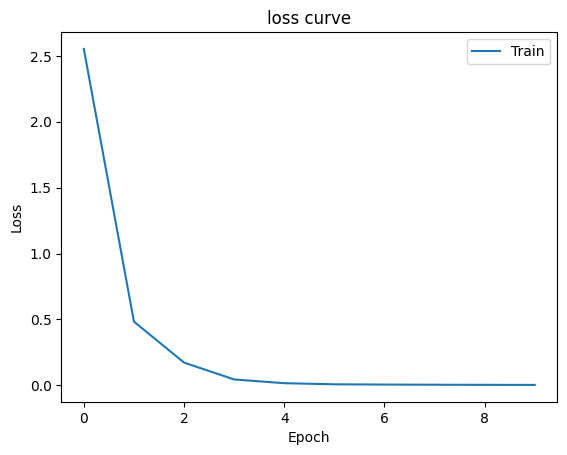

In [70]:
print("Loss Curve :",ann.history['loss'])
plt.plot(ann.history['loss'])
plt.title('loss curve')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()


In [41]:
#GUI_imp
from tkinter import *
import tkinter as tk
from tkinter import filedialog
from tkinter.filedialog import askopenfile
from PIL import Image, ImageTk
 
root = tk.Tk()
root.geometry("1500x1050")  # Size of the window 
root.resizable(width=False, height=False)
root.title('Object Detector')
root['background']='#222227' 
my_font1=('times', 18, 'bold')
my_font2=('times', 12, 'bold')
label = tk.Label(root,text='Upload Files & Detect',width=30,font=my_font1)
label.grid(row=1,column=1)
label.place(anchor = CENTER, relx = .5, rely = .025)
 
 
b1 = tk.Button(root, text='Upload Images', 
   width=20,command = lambda:upload_file())
b1.grid(row=2,column=1,pady=5)
b1.place(anchor = CENTER, relx = .5, rely = .1)
def upload_file():
    f_types = [('Jpg Files', '*.jpg'),
    ('PNG Files','*.png'),('Jpeg Files', '*.jpeg')]   # types of files to select 
    filename = tk.filedialog.askopenfilename(multiple=True,filetypes=f_types)
    col=1 # start from column 1
    row=3 # start from row 3 
    for pathgui in filename:
        img=Image.open(pathgui)# read the image file
        list_of_images = []
        img_preprocessed = cv2.imread(pathgui, cv2.IMREAD_COLOR)
        img_preprocessed = cv2.resize(img_preprocessed, (img_size,img_size))
        img_preprocessed = cv2.cvtColor(img_preprocessed, cv2.COLOR_RGB2BGR)
        list_of_images.append(img_preprocessed)
        arr = np.array(list_of_images)
        feature_extractor_input=VGG_model.predict(arr)
        features_input = feature_extractor_input.reshape(feature_extractor_input.shape[0], -1)

        prediction_input = model.predict(features_input).argmax() #edited
        prediction_input_Normal = le.inverse_transform([prediction_input]) #edited
        img=img.resize((144,144)) # new width & height
        img=ImageTk.PhotoImage(img)
        e1 =tk.Label(root)
        e1.grid(row=row,column=col,pady=100,padx=10)
        e1.image = img
        text_answer=prediction_input_Normal[0] #edited
        # text_answer=text_answer.tolist()
        l2 = tk.Label(root,text=text_answer,width=20,font=my_font2)  
        l2.grid(row=row+1,column=col,pady=0,padx=10)
        e1['image']=img # garbage collection
        if(col==7): # start new line after third column
            row=row+2# start wtih next row
            col=1    # start with first column
        else:       # within the same row 
            col=col+1 # increase to next column      
                                                                          
root.mainloop()  # Keep the window open# your code goes here


1/1 [==============================] - 0s 26ms/step
